In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore

**You might get lost from here on. So, we decided to provide you with sections.**  
&emsp;1) [Load Data](#loaddata)  
&emsp;2) [Quick Clean-Up for EDA](#firstcleanup)  
&emsp;3) [Analyze Data and EDA](#eda)  
&emsp;4) [Create Preprocessing Pipeline](#prepro)  
&emsp;5) [Analysis Methods](#modelling)  
&emsp;6) [Ethical Considerations](#ethics)

# 1) Load Data <a name="loaddata"></a>

In [2]:
df = pd.read_csv('adult_reconstruction.csv')
df

,hours-per-week,age,capital-gain,capital-loss,workclass,education,education-num,marital-status,relationship,race,gender,native-country,income,occupation
0,20,40,0,0,Private,Bachelors,13,Married-civ-spouse,Wife,White,Female,United-States,49100,Tech-support
1,40,21,0,0,Private,Some-college,10,Divorced,Own-child,White,Male,United-States,11500,Craft-repair
2,10,17,0,0,Private,11th,7,Never-married,Own-child,White,Male,United-States,2600,Other-service
3,50,51,0,0,Private,HS-grad,9,Married-civ-spouse,Husband,Asian-Pac-Islander,Male,Cambodia,38997,Sales
4,38,28,0,0,Private,Bachelors,13,Never-married,Not-in-family,White,Male,?,41400,Exec-managerial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49526,65,35,0,0,Private,Bachelors,13,Married-civ-spouse,Husband,White,Male,Yugoslavia,85080,Farming-fishing
49527,77,37,3137,0,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Husband,Asian-Pac-Islander,Male,Vietnam,34137,Sales
49528,55,24,0,0,Private,Assoc-voc,11,Never-married,Not-in-family,White,Male,United-States,13016,Sales
49529,40,24,0,0,Private,Some-college,10,Never-married,Not-in-family,White,Female,United-States,15000,Adm-clerical


# 2) Quick Clean-Up for EDA <a name="firstcleanup"></a>

#### Fix missing values

In [3]:
df.isnull().sum()

hours-per-week    0
age               0
capital-gain      0
capital-loss      0
workclass         0
education         0
education-num     0
marital-status    0
relationship      0
race              0
gender            0
native-country    0
income            0
occupation        0
dtype: int64

#### There are some cells with ? in it, so we replace with nans and check the percentage of missing values.

In [4]:
df.isin(['?']).sum()

hours-per-week       0
age                  0
capital-gain         0
capital-loss         0
workclass         2859
education            0
education-num        0
marital-status       0
relationship         0
race                 0
gender               0
native-country     859
income               0
occupation        2869
dtype: int64

In [5]:
df['workclass'] = df['workclass'].replace('?', np.nan)
df['occupation'] = df['occupation'].replace('?', np.nan)
df['native-country'] = df['native-country'].replace('?', np.nan)


In [6]:
perc1 = df['workclass'].isnull().sum()/len(df['workclass'])*100
perc2 = df['occupation'].isnull().sum()/len(df['occupation'])*100
perc3 = df['native-country'].isnull().sum()/len(df['native-country'])*100
print("Missing =", perc1,"% in 'workclass',", perc2,"% in 'occupation',", perc3,"% in 'native-country'")


Missing = 5.7721426985120425 % in 'workclass', 5.792332074862207 % in 'occupation', 1.7342674284791342 % in 'native-country'


In [7]:
lenBefore = df['workclass']
df.dropna(how='any', inplace=True)
df.isnull().sum()

hours-per-week    0
age               0
capital-gain      0
capital-loss      0
workclass         0
education         0
education-num     0
marital-status    0
relationship      0
race              0
gender            0
native-country    0
income            0
occupation        0
dtype: int64

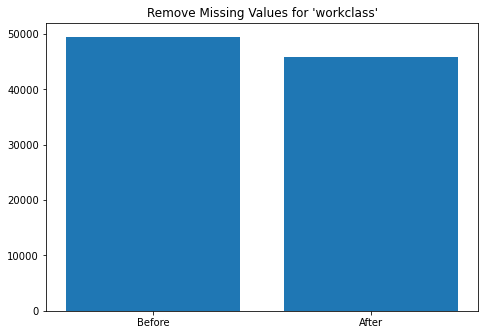

In [8]:
lenAfter = df['workclass']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xaxis = ['Before', 'After']
yaxis = [len(lenBefore), len(lenAfter)]
ax.bar(xaxis,yaxis)
plt.title("Remove Missing Values for 'workclass'")
plt.show()

In [9]:
## Check if there are any duplicate rows
df.duplicated().sum()

208

In [10]:
df = df.drop_duplicates()

# 3) Analyze Data & EDA <a name="eda"></a>

1. Is there a relationship between sex/race/age and income?
2. Is a certain sex/race preferred in a certain occupation given the same education levels?
3. Which group of people (considering age, sex, race, marital status) is working the most in terms of hours per week?
4. How are the occupation types distributed over the genders? (Are in ‘Tech-Support’ more males or females occupied for example)


In [11]:
print(df.shape)
df.describe()

(45641, 14)


,hours-per-week,age,capital-gain,capital-loss,education-num,income
count,45641.000000,45641.000000,45641.000000,45641.000000,45641.00000,45641.000000
mean,40.915120,38.487566,1080.570759,87.546307,10.10438,34417.740606
std,11.966191,13.211451,7426.000706,402.596785,2.54683,26870.885616
min,1.000000,17.000000,0.000000,0.000000,1.00000,107.000000
25%,40.000000,28.000000,0.000000,0.000000,9.00000,13200.000000
50%,40.000000,37.000000,0.000000,0.000000,10.00000,27260.000000
75%,45.000000,47.000000,0.000000,0.000000,12.00000,49515.000000
max,99.000000,90.000000,99999.000000,4356.000000,16.00000,99999.000000


In [12]:
# The highest correlation is 0.408262, education-num and income
df.corr(method ='pearson')

,hours-per-week,age,capital-gain,capital-loss,education-num,income
hours-per-week,1.000000,0.103021,0.083526,0.054216,0.146021,0.347593
age,0.103021,1.000000,0.079491,0.059786,0.038265,0.325923
capital-gain,0.083526,0.079491,1.000000,-0.031643,0.126109,0.287423
capital-loss,0.054216,0.059786,-0.031643,1.000000,0.082126,0.172733
education-num,0.146021,0.038265,0.126109,0.082126,1.000000,0.408262
income,0.347593,0.325923,0.287423,0.172733,0.408262,1.000000


<AxesSubplot:>

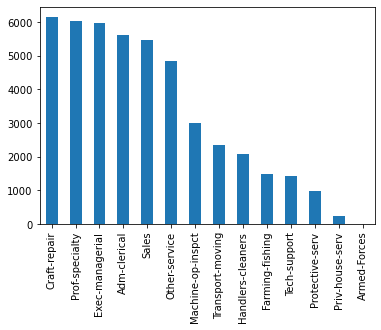

In [13]:
occ=df['occupation'].value_counts()
occ.plot.bar()

<AxesSubplot:>

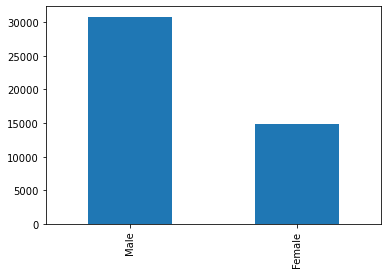

In [14]:
gender=df['gender'].value_counts()
gender.plot.bar()

In [15]:
#Encode the occupations into numbers for the plot below
dictt = dict()
count = 1
for k in list(set(list(df['occupation']))):
    dictt[k]=count
    count+=1
dictt

{'Farming-fishing': 1,
 'Exec-managerial': 2,
 'Adm-clerical': 3,
 'Tech-support': 4,
 'Other-service': 5,
 'Priv-house-serv': 6,
 'Prof-specialty': 7,
 'Machine-op-inspct': 8,
 'Transport-moving': 9,
 'Protective-serv': 10,
 'Armed-Forces': 11,
 'Handlers-cleaners': 12,
 'Sales': 13,
 'Craft-repair': 14}

In [16]:
newdf = df.copy()
for d in dictt:
    newdf=newdf.replace(d, dictt[d])

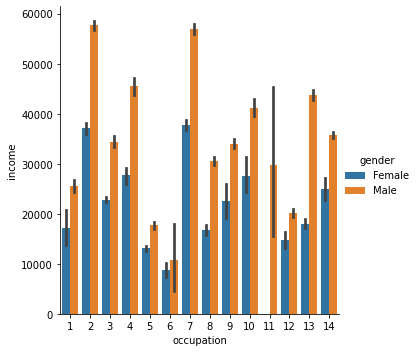

In [17]:
## cat plot of occupation and gender
## we need to show the x label better maybe with numbers
sns.catplot(data=newdf, kind="bar", x="occupation", y="income", hue="gender")

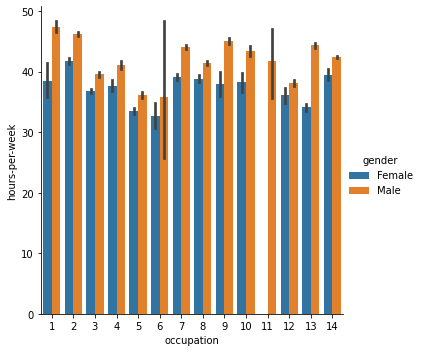

In [18]:
## cat plot of hours and gender
# We can see that men usually work more. To better visualize this, a histplot has been contstructed below
sns.catplot(data=newdf, kind="bar", x="occupation", y="hours-per-week", hue="gender")

99497.03015075377


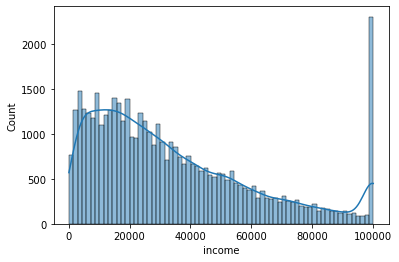

In [19]:
ax = sns.histplot(df['income'], bins=70, kde=True)

kdeline = ax.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()

##The last bin to remove
print(xs[-2])

<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

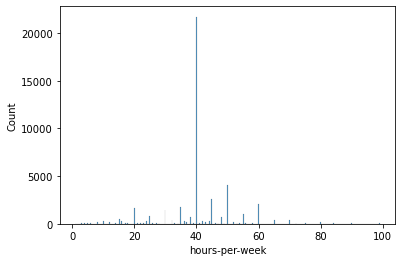

In [20]:
sns.histplot(df['hours-per-week'])
# we need to decrease the number of bins to better understand the plot

<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

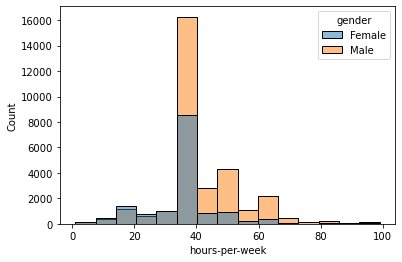

In [21]:
sns.histplot(data=df, x="hours-per-week", bins=15, hue='gender')
#Here we can see the differnece in the hours worked per week between the 2 genders
# we can also see that there are outliers that need to be removed
# It has 2-3 modes

<AxesSubplot:xlabel='age', ylabel='Count'>

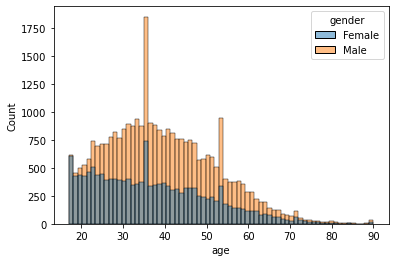

In [22]:
sns.histplot(data=df, x="age", hue="gender")
# It clearly has 2 modes

<AxesSubplot:xlabel='income', ylabel='Count'>

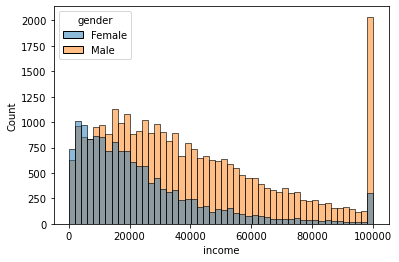

In [23]:
sns.histplot(data=df, x="income", hue="gender")

##### Let's check for which categorical data feature engineering is worth it

In [24]:
def drawPlot(xName):

    fig, axs = plt.subplots(nrows=2)

    sns.boxplot(
        x=xName,
        y='income',
        data=df.sort_values(xName),
        ax=axs[0]
    )

    sns.countplot(
        x=xName,
        data=df.sort_values(xName),
        ax=axs[1]
    )

    # Draw median price
    axs[0].axhline(
        y=df['income'].median(), 
        color='red',
        linestyle='dotted'
    )

    # Label the bars with counts
    for patch in axs[1].patches:
        x = patch.get_bbox().get_points()[:, 0]
        y = patch.get_bbox().get_points()[1, 1]
        axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')

    # Format x-axes
    axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
    axs[0].xaxis.set_visible(False)

    # Narrow the gap between the plots
    plt.subplots_adjust(hspace=0.01)

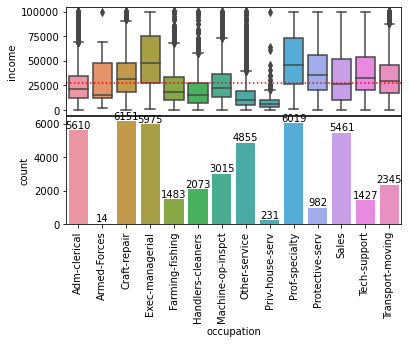

In [25]:
drawPlot("occupation")

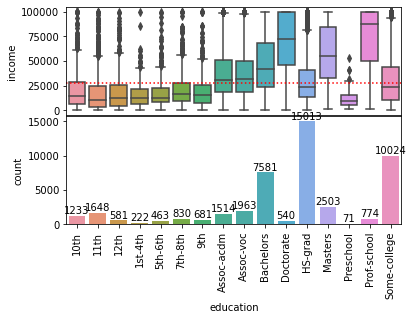

In [26]:
drawPlot("education")

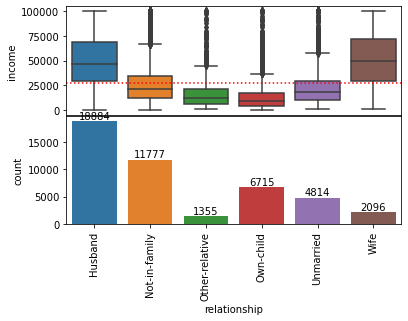

In [27]:
drawPlot("relationship")

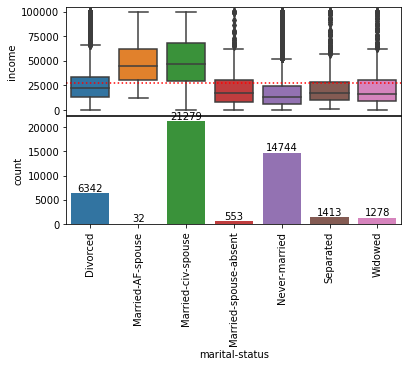

In [28]:
drawPlot("marital-status")

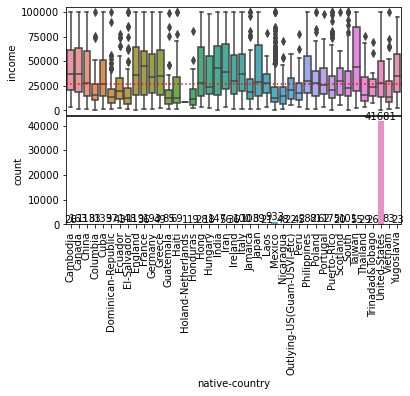

In [29]:
# Very biased, so no feature engineering on this feature
drawPlot("native-country")

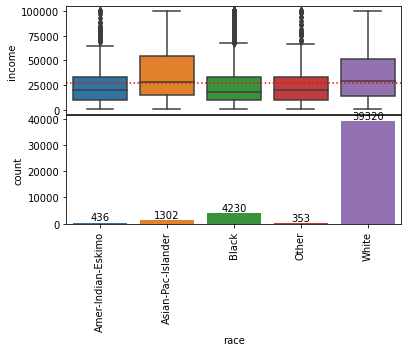

In [30]:
# Very biased, so no feature engineering on this feature as well as not on gender
drawPlot("race")

### Check for Outliers

<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

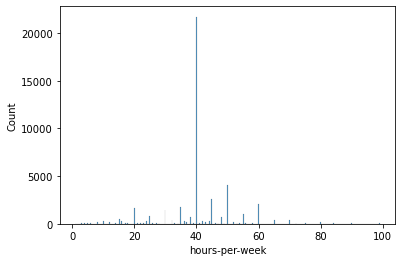

In [31]:
sns.histplot(df['hours-per-week'])

<AxesSubplot:xlabel='income', ylabel='Count'>

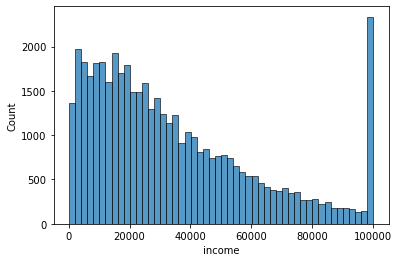

In [32]:
sns.histplot(df['income'])

<AxesSubplot:xlabel='age', ylabel='Count'>

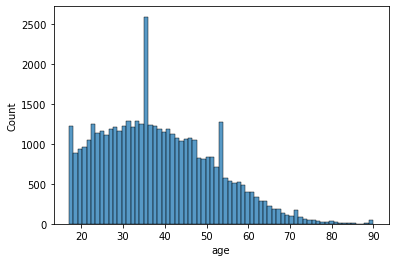

In [33]:
sns.histplot(df['age'])

<AxesSubplot:xlabel='education-num', ylabel='Count'>

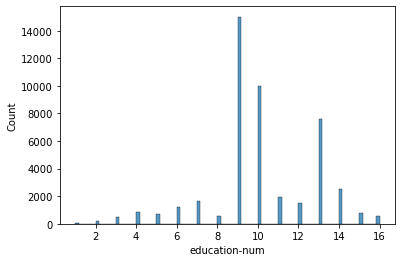

In [34]:
sns.histplot(df['education-num'])

<AxesSubplot:xlabel='capital-gain', ylabel='Count'>

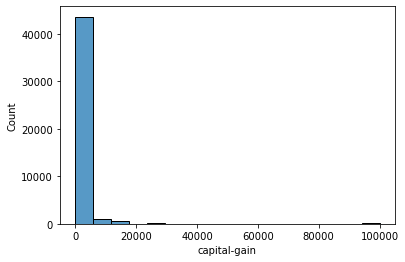

In [35]:
sns.histplot(df['capital-gain'])

<AxesSubplot:xlabel='capital-loss', ylabel='Count'>

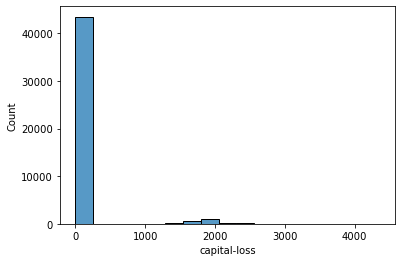

In [36]:
sns.histplot(df['capital-loss'])

In [37]:
# Are the 0's in capital-gain and capital-loss missing values or indeed 0?

# 4) Create The Preprocessing Pipeline <a name="prepro"></a>

In [38]:
def select_columns(data, *columns):
    all_columns = []

    for val in data.columns:
        if val.startswith(columns):
            all_columns.append(val)

    return data.reindex(columns = all_columns)

In [39]:
def standardize_columns(data,epsilon=1e-100):
    standardized_data = (data - np.mean(data))/(np.std(data) + epsilon)
    return standardized_data

In [40]:
def remove_outliers_sd(data, variable):

    return data.loc[(np.abs(stats.zscore(data[variable])) < 3)]

In [41]:
def remove_outliers_bound(data, variable, lower=-np.inf, upper=np.inf):

    return data.loc[(data[variable] > lower) & (data[variable] < upper)]

In [42]:
def rmse(actual, predicted):
    rmse = np.sqrt(np.mean((actual - predicted)**2))
    # Normalized RMSE
    return rmse/(max(actual)-min(actual))

###### Create function for dummy values for all categorical data

In [83]:
def oheCategoricalData(data):
    to_drop = ["workclass", "education", "marital-status", "relationship", "race", "native-country", "occupation", "gender"]
    dummy_vars = pd.get_dummies(data[to_drop])
    data = pd.concat([data.drop(to_drop, axis=1), dummy_vars], axis = 1)
    return data


###### Create functions for feature engineering

In [84]:
def find_highIncome(xName, data, n=3, metric=np.median ):
    return data.groupby(xName).agg(metric).sort_values(by=["income"],ascending=False).iloc[:n].index.values.tolist()

def add_in_highIncome(data, highIncome, xName):
    data["in_rich_"+xName] = 0
    mask = data[xName].isin(highIncome)
    data.loc[mask,"in_rich_"+xName] = 1
    return data, "in_rich_"+xName

In [157]:
def process_data(data):
    # Drop NaNs and duplicates
    data['workclass'] = data['workclass'].replace('?', np.nan)
    data['occupation'] = data['occupation'].replace('?', np.nan)
    data['native-country'] = data['native-country'].replace('?', np.nan)
    data.dropna(how='any', inplace=True)
    data = data.drop_duplicates()
    
    # Feature Engineering
    rich_Occupation = find_highIncome('occupation', data, n=3, metric=np.median )
    data, richOccs = add_in_highIncome(data, rich_Occupation, 'occupation')
    
    rich_Education = find_highIncome('education', data, n=3, metric=np.median )
    data, richEds = add_in_highIncome(data, rich_Education, 'education')

    rich_rel = find_highIncome('relationship', data, n=3, metric=np.median )
    data, richRels = add_in_highIncome(data, rich_rel, 'relationship')

    rich_MS = find_highIncome('marital-status', data, n=1, metric=np.median )
    data, richMS = add_in_highIncome(data, rich_MS, 'marital-status')
    
    # Create dummy variables for categorical    
    data = oheCategoricalData(data)



    data = (
        data
        # Clean Data
        .pipe(remove_outliers_sd, 'hours-per-week') # (681 outliers)
        .pipe(remove_outliers_bound, 'income', upper = 99497 ) 

        # Transform data
        .pipe(select_columns, 
              'age',                                 
              'education-num', 
              'workclass',
              'hours-per-week',
              'income',
              richOccs,
              richEds,
              richMS,

             )
    ) 
    
    # X = standardize_columns(data).drop(['income'], axis = 1)
    X = data.drop(['income'], axis = 1)
    y = data['income']
    
    return X, y

# 5) Analysis Methods <a name="modelling"></a>

5. Can we predict if the yearly income of a person is above 50k dollars or lower with logistic regression and decision trees?
6. Which machine learning model performs better in terms of RMSE (for Q5)?


In [158]:
main_df = pd.read_csv('adult_reconstruction.csv')
X, y = process_data(main_df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

C:\Users\YAGMUR~1.MAV\AppData\Local\Temp/ipykernel_8436/2539868690.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["in_rich_"+xName] = 0
C:\Users\yagmur.mavruk\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [159]:
display(X_train)

,hours-per-week,age,education-num,in_rich_occupation,in_rich_education,in_rich_marital-status,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
2119,40,39,13,1,0,0,0,0,1,0,0,0,0
26829,40,38,9,0,0,1,0,0,1,0,0,0,0
20287,30,25,13,0,0,0,0,0,1,0,0,0,0
7046,40,32,9,0,0,0,0,0,1,0,0,0,0
37282,50,38,9,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6537,50,32,9,0,0,1,0,0,1,0,0,0,0
41329,40,24,9,0,0,0,0,0,1,0,0,0,0
23824,20,58,10,1,0,0,0,0,0,0,0,1,0
21726,40,36,9,0,0,0,0,0,1,0,0,0,0


#### Lasso Model

In [160]:
from sklearn import linear_model as lm
alphas = np.arange(0.1, 200.1, .1)
final_model = lm.LassoCV(alphas=alphas,cv=5, max_iter = 10000)
final_model.fit(X_train, y_train)

y_predicted_train = final_model.predict(X_train)
y_predicted_test = final_model.predict(X_test)

train_score = rmse(y_predicted_train, y_train)
test_score = rmse(y_predicted_test, y_test)

print("RMSE Train: ", train_score, " RMSE Test: ", test_score)

RMSE Train:  0.17129834465131405  RMSE Test:  0.17600750146048016


### Comparing Plots of Test and Predicted Income Values Based on Gender

In [168]:
test_copy = X_test.copy()
test_copy = pd.concat([X_test, y_test], axis = 1)
test_copy['prediction'] = y_predicted_test

test_copy['gender'] = df[df.index.isin(test_copy.index)]['gender']
test_copy['occupation'] = df[df.index.isin(test_copy.index)]['occupation']

<AxesSubplot:xlabel='income', ylabel='Count'>

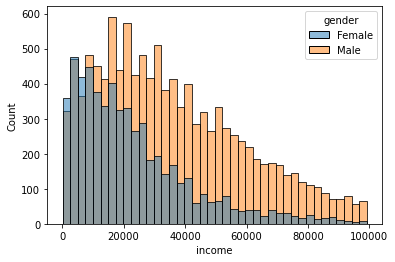

In [162]:
sns.histplot(data=test_copy, x='income', hue="gender")

<AxesSubplot:xlabel='prediction', ylabel='Count'>

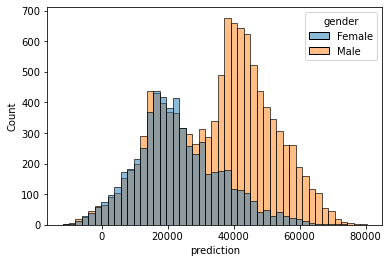

In [163]:
sns.histplot(data=test_copy, x='prediction', hue="gender")

In [164]:
for d in dictt:
    test_copy=test_copy.replace(d, dictt[d])

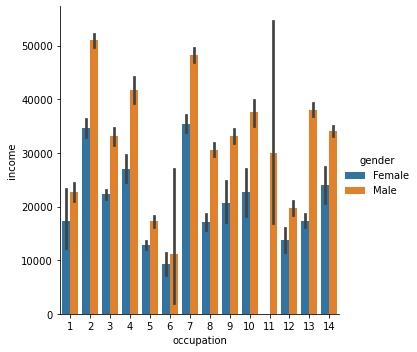

In [166]:
sns.catplot(data=test_copy, kind="bar", x="occupation", y="income", hue="gender")

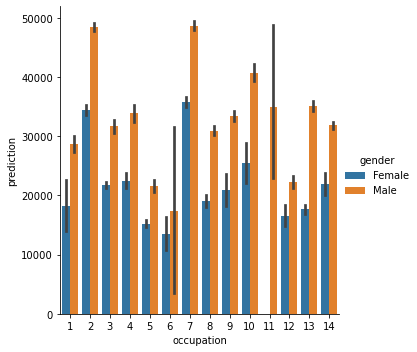

In [167]:
sns.catplot(data=test_copy, kind="bar", x="occupation", y="prediction", hue="gender")

#### Logistic Regression

In [144]:
# from sklearn.linear_model import LogisticRegression
# final_model2 = LogisticRegression(random_state=0)
# final_model2.fit(X_train, y_train)
# y_predicted_train2 = final_model2.predict(X_train)
# y_predicted_test2 = final_model2.predict(X_test)

# train_score2 = rmse(y_predicted_train2, y_train)
# test_score2 = rmse(y_predicted_test2, y_test)

# print("RMSE Train: ", train_score2, " RMSE Test: ", test_score2)

# # wtf am i doing wrong??????????????????????


#### Decision Trees

In [50]:
# from sklearn.tree import DecisionTreeClassifier
# final_model = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

# y_predicted_train = final_model.predict(X_train)
# y_predicted_test = final_model.predict(X_test)

# train_score = rmse(y_predicted_train, y_train)
# test_score = rmse(y_predicted_test, y_test)

# print("RMSE Train: ", train_score, " RMSE Test: ", test_score)

# Ethical Considerations <a name="ethics"></a>